In [1]:
!pip install py-postgresql

     |████████████████████████████████| 1.1MB 4.9MB/s 
  Created wheel for py-postgresql: filename=py_postgresql-1.2.1-cp36-cp36m-linux_x86_64.whl size=286151 sha256=93b4539c6e5ae3bf7bbb73de0911347aa3c1501aae77e36c1b6c7b32a3416dae
  Stored in directory: /root/.cache/pip/wheels/ec/7f/b4/b48ae4e52b1e0bf0288d8c274bdefbc9ac8e0b9abec2c26d63
Successfully built py-postgresql


In [2]:
!pip install psycopg2-binary

     |████████████████████████████████| 2.9MB 4.9MB/s 


In [0]:
import psycopg2
import postgresql
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [0]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source

## 1. Create a DataFrame with the Census Data from HW2

Find two examples in the course content in Blackboard  
Database Details:   
user='new_haven_ds_read'  
password='new_haven_ds_secret_99'  
host='nhds.cwroivw0q1rc.us-east-1.rds.amazonaws.com'  
database='nhds'  
  
  
 SQL: sql = 'select * from nhds.uci_adults'

In [0]:
conn = psycopg2.connect(user='new_haven_ds_read', password='new_haven_ds_secret_99',host='nhds.cwroivw0q1rc.us-east-1.rds.amazonaws.com',database='nhds')
sql = 'select * from nhds.uci_adults'
cursor = conn.cursor()
cursor.execute(sql)
res = cursor.fetchall()

In [6]:
df = pd.DataFrame(res)
df.tail()

0              1       2   ...              13      14     15
32556  27        Private  257302  ...   United-States   <=50K  32557
32557  40        Private  154374  ...   United-States    >50K  32558
32558  58        Private  151910  ...   United-States   <=50K  32559
32559  22        Private  201490  ...   United-States   <=50K  32560
32560  52   Self-emp-inc  287927  ...   United-States    >50K  32561

[5 rows x 16 columns]

## 2. Split the data into training and testing sets

In [7]:
X=df.iloc[:,:-2]
X[14]=df.iloc[:,-1]
X

0                  1       2   ...  12              13     14
0      39          State-gov   77516  ...  40   United-States      1
1      50   Self-emp-not-inc   83311  ...  13   United-States      2
2      38            Private  215646  ...  40   United-States      3
3      53            Private  234721  ...  40   United-States      4
4      28            Private  338409  ...  40            Cuba      5
...    ..                ...     ...  ...  ..             ...    ...
32556  27            Private  257302  ...  38   United-States  32557
32557  40            Private  154374  ...  40   United-States  32558
32558  58            Private  151910  ...  40   United-States  32559
32559  22            Private  201490  ...  20   United-States  32560
32560  52       Self-emp-inc  287927  ...  40   United-States  32561

[32561 rows x 15 columns]

In [8]:
y=df.iloc[:,-2]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: 14, Length: 32561, dtype: object

In [0]:
#X=pd.DataFrame()

In [0]:
#X[0]=df.iloc[:,0]
#X[2]=df.iloc[:,2]
#X[4]=df.iloc[:,4]
#X[6]=df.iloc[:,6]
#X[10]=df.iloc[:,10]
#X[11]=df.iloc[:,11]
#X[12]=df.iloc[:,12]
#X[15]=df.iloc[:,15]

#X[1]=df.iloc[:,1]
#X[3]=df.iloc[:,3]
#X[5]=df.iloc[:,5]
#X[7]=df.iloc[:,7]
#X[8]=df.iloc[:,8]
#X[9]=df.iloc[:,9]
#X[13]=df.iloc[:,13]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1,random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(29304, 15) (29304,)
(3257, 15) (3257,)


## 3. Use sklearn's LabelEncoder to make the columns with strings usuable

In [12]:
df.head()

0                  1       2           3   ...  12              13      14 15
0  39          State-gov   77516   Bachelors  ...  40   United-States   <=50K  1
1  50   Self-emp-not-inc   83311   Bachelors  ...  13   United-States   <=50K  2
2  38            Private  215646     HS-grad  ...  40   United-States   <=50K  3
3  53            Private  234721        11th  ...  40   United-States   <=50K  4
4  28            Private  338409   Bachelors  ...  40            Cuba   <=50K  5

[5 rows x 16 columns]

In [13]:
df.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
15     int64
dtype: object

In [0]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [15]:
df.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
dtype: object

In [16]:
y=df.iloc[:,-2]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: 14, Length: 32561, dtype: int64

In [17]:
X=df.iloc[:,:-2]
X[14]=df.iloc[:,-1]
X

0   1       2   3   4   5   6   7   8   9      10  11  12  13     14
0      39   7   77516   9  13   4   1   1   4   1   2174   0  40  39      1
1      50   6   83311   9  13   2   4   0   4   1      0   0  13  39      2
2      38   4  215646  11   9   0   6   1   4   1      0   0  40  39      3
3      53   4  234721   1   7   2   6   0   2   1      0   0  40  39      4
4      28   4  338409   9  13   2  10   5   2   0      0   0  40   5      5
...    ..  ..     ...  ..  ..  ..  ..  ..  ..  ..    ...  ..  ..  ..    ...
32556  27   4  257302   7  12   2  13   5   4   0      0   0  38  39  32557
32557  40   4  154374  11   9   2   7   0   4   1      0   0  40  39  32558
32558  58   4  151910  11   9   6   1   4   4   0      0   0  40  39  32559
32559  22   4  201490  11   9   4   1   3   4   1      0   0  20  39  32560
32560  52   5  287927  11   9   2   4   5   4   0  15024   0  40  39  32561

[32561 rows x 15 columns]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(26048, 15) (26048,)
(6513, 15) (6513,)


## 4. Create a Decision Tree with the Census Data

In [19]:
df

0  1       2   3   4  5   6  7  8  9     10  11  12  13  14     15
0      39  7   77516   9  13  4   1  1  4  1   2174   0  40  39   0      1
1      50  6   83311   9  13  2   4  0  4  1      0   0  13  39   0      2
2      38  4  215646  11   9  0   6  1  4  1      0   0  40  39   0      3
3      53  4  234721   1   7  2   6  0  2  1      0   0  40  39   0      4
4      28  4  338409   9  13  2  10  5  2  0      0   0  40   5   0      5
...    .. ..     ...  ..  .. ..  .. .. .. ..    ...  ..  ..  ..  ..    ...
32556  27  4  257302   7  12  2  13  5  4  0      0   0  38  39   0  32557
32557  40  4  154374  11   9  2   7  0  4  1      0   0  40  39   1  32558
32558  58  4  151910  11   9  6   1  4  4  0      0   0  40  39   0  32559
32559  22  4  201490  11   9  4   1  3  4  1      0   0  20  39   0  32560
32560  52  5  287927  11   9  2   4  5  4  0  15024   0  40  39   1  32561

[32561 rows x 16 columns]

In [20]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
y_results = pd.DataFrame(Y_test)
y_results['prediction'] = dtree.predict(X_test)
y_results['error'] = (y_results['prediction']) - (y_results.iloc[:,0])
y_results.tail()

14  prediction  error
7694    1           1      0
10410   1           0     -1
1043    1           1      0
30860   0           0      0
12467   1           0     -1

In [22]:
y_results['error'].abs().mean()

0.1971441731920774

In [0]:
from sklearn import metrics

In [36]:
utfall = (y_results['prediction'] == y_results.iloc[:,0]).value_counts()
print("The decision tree predicts the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The decision tree predicts the test data in 80.28558268079226 % of the cases.


In [37]:
print("Accuracy:",metrics.accuracy_score(y_results['prediction'], y_results.iloc[:,0]))

Accuracy: 0.8028558268079227


In [0]:
y_results = pd.DataFrame(Y_test)
y_results['prediction'] = dtree.predict(X_test)
y_results['error'] = (y_results['prediction']) - (y_results.iloc[:,0])
y_results.tail()

14  prediction  error
7694    1           1      0
10410   1           0     -1
1043    1           1      0
30860   0           0      0
12467   1           0     -1

In [0]:
y_results = pd.DataFrame(Y_test)
y_results['prediction'] = dtree.predict(X_test)
y_results['error'] = (y_results['prediction']) - (y_results.iloc[:,0])
y_results.tail()

14  prediction  error
7694    1           1      0
10410   1           0     -1
1043    1           1      0
30860   0           0      0
12467   1           0     -1

## 5. Export a graphical visualization of your tree.  You may find it easy to use the graphviz package.

In [23]:
from sklearn.externals.six import StringIO 
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.25052 to fit



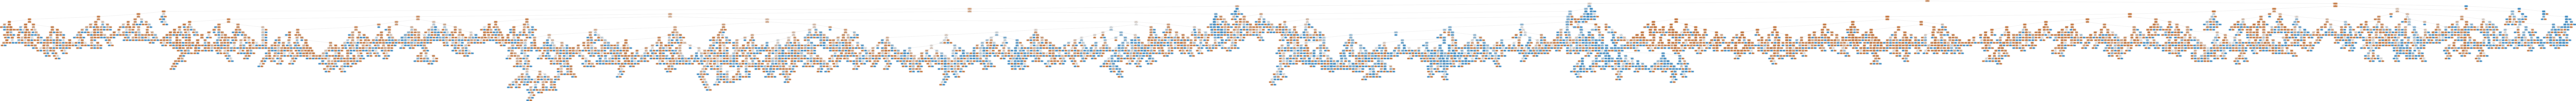

In [24]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 6. Create a Random Forest with the same Census Data

In [0]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor


In [26]:
w_rf = RandomForestClassifier(n_estimators=100)
w_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_results_random = pd.DataFrame(Y_test)
y_results_random['prediction'] = w_rf.predict(X_test)
y_results_random['error'] = (y_results_random['prediction']) - (y_results_random.iloc[:,0])
y_results_random.tail()

14  prediction  error
7694    1           0     -1
10410   1           1      0
1043    1           1      0
30860   0           0      0
12467   1           1      0

In [28]:
y_results_random['error'].abs().mean()

0.13972055888223553

In [35]:
utfall = (y_results_random['prediction'] == y_results_random.iloc[:,0]).value_counts()
print("The random forest predicts the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The random forest predicts the test data in 86.02794411177645 % of the cases.


In [39]:
print("Accuracy:",metrics.accuracy_score(y_results_random['prediction'], y_results.iloc[:,0]))

Accuracy: 0.8602794411177644


# 7. Compare the Accuracy of the Random Forest and the base Decision Tree.  Which is Better?  Why?

Random Forest


In [40]:
acc=1-y_results_random['error'].abs().mean()
acc

0.8602794411177644

Decision tree

In [41]:
acc1=1-y_results['error'].abs().mean()
acc1

0.8028558268079227

In [44]:
(acc-acc1)*100

5.742361430984177

So Random forest accuracy is 5.74% greater than decision tree accuracy in this case.

Random forest has better accuracy than decision tree because Random forests consist of multiple single trees each based on a random sample of the training data. They are typically more accurate than single decision trees.Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results